Epoch 1/30
30/30 [==============================] - 2s 48ms/step - loss: 0.5215 - accuracy: 0.7836 - val_loss: 0.3994 - val_accuracy: 0.8538
Epoch 2/30
30/30 [==============================] - 1s 36ms/step - loss: 0.3133 - accuracy: 0.8991 - val_loss: 0.3179 - val_accuracy: 0.8768
Epoch 3/30
30/30 [==============================] - 1s 36ms/step - loss: 0.2264 - accuracy: 0.9269 - val_loss: 0.2948 - val_accuracy: 0.8835
Epoch 4/30
30/30 [==============================] - 1s 36ms/step - loss: 0.1768 - accuracy: 0.9437 - val_loss: 0.2838 - val_accuracy: 0.8897
Epoch 5/30
30/30 [==============================] - 1s 37ms/step - loss: 0.1458 - accuracy: 0.9529 - val_loss: 0.2781 - val_accuracy: 0.8897
Epoch 6/30
30/30 [==============================] - 1s 37ms/step - loss: 0.1168 - accuracy: 0.9646 - val_loss: 0.2920 - val_accuracy: 0.8897
Epoch 7/30
30/30 [==============================] - 1s 36ms/step - loss: 0.0962 - accuracy: 0.9716 - val_loss: 0.3322 - val_accuracy: 0.8785
Epoch 8/30
30

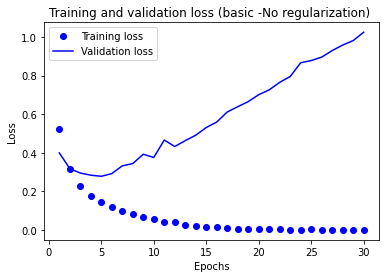

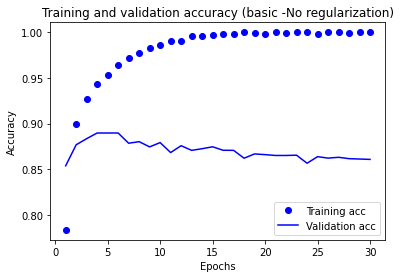

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4751 - accuracy: 0.8167
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2663 - accuracy: 0.9089
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.1993 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3004 - accuracy: 0.8831
Loss:[0.300430566072464]   Accuracy:[0.883080005645752]


In [14]:

# Loading the IMDB dataset (No regularization - basic [1])
#******************************
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])


# Decoding reviews back to text
#******************************
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

#Preparing the data
#Encoding the integer sequences via multi-hot encoding
#*****************************************************
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Building your model
# Model definition
#******************************
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
model = keras.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
model.add(layers.Dense(16, activation="relu"))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
model.add(layers.Dense(16, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

# Compiling the model
#******************************
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Validating your approach
# Setting aside a validation set
#*******************************
x_val = x_train[:10000] # to be used for validation
partial_x_train = x_train[10000:] 
y_val = y_train[:10000] # to be used for validation
partial_y_train = y_train[10000:]


# Training your model
#*******************************
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss
#******************************************
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (basic -No regularization) ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and validation accuracy
#**********************************************
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy (basic -No regularization)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch
#********************************
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(f"Loss:[{results[0]}]   Accuracy:[{results[1]}]")

first= history_dict['val_accuracy']
# Using a trained model to generate predictions on new data
#**********************************************************
#model.predict(x_test)




Epoch 1/30
15/15 [==============================] - 1s 53ms/step - loss: 0.6163 - accuracy: 0.7085 - val_loss: 0.4995 - val_accuracy: 0.8380
Epoch 2/30
15/15 [==============================] - 1s 38ms/step - loss: 0.4203 - accuracy: 0.8739 - val_loss: 0.3972 - val_accuracy: 0.8690
Epoch 3/30
15/15 [==============================] - 1s 38ms/step - loss: 0.3064 - accuracy: 0.9199 - val_loss: 0.3421 - val_accuracy: 0.8786
Epoch 4/30
15/15 [==============================] - 1s 37ms/step - loss: 0.2328 - accuracy: 0.9416 - val_loss: 0.3132 - val_accuracy: 0.8792
Epoch 5/30
15/15 [==============================] - 1s 39ms/step - loss: 0.1842 - accuracy: 0.9535 - val_loss: 0.3007 - val_accuracy: 0.8836
Epoch 6/30
15/15 [==============================] - 1s 38ms/step - loss: 0.1465 - accuracy: 0.9628 - val_loss: 0.2923 - val_accuracy: 0.8846
Epoch 7/30
15/15 [==============================] - 1s 36ms/step - loss: 0.1133 - accuracy: 0.9773 - val_loss: 0.3146 - val_accuracy: 0.8732
Epoch 8/30
15

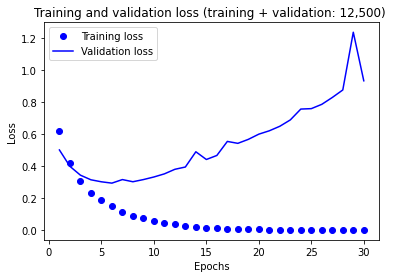

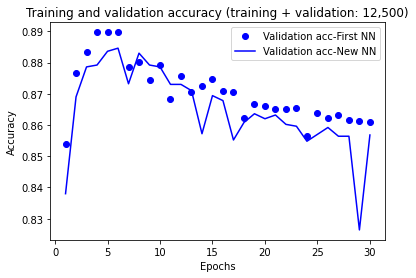

Epoch 1/4
25/25 [==============================] - 2s 34ms/step - loss: 0.5510 - accuracy: 0.7660
Epoch 2/4
25/25 [==============================] - 1s 35ms/step - loss: 0.3509 - accuracy: 0.8914
Epoch 3/4
25/25 [==============================] - 1s 34ms/step - loss: 0.2520 - accuracy: 0.9261
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2983 - accuracy: 0.8809
Loss:[0.29825136065483093]   Accuracy:[0.8808799982070923]


In [15]:
# Loading the IMDB dataset (Reduce the training set size by half (training + validation: 12,500) [2])
#******************************
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data=train_data[0:12500]
train_labels=train_labels[0:12500]

train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])


# Decoding reviews back to text
#******************************
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

#Preparing the data
#Encoding the integer sequences via multi-hot encoding
#*****************************************************
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Building your model
# Model definition
#******************************
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
model = keras.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
model.add(layers.Dense(16, activation="relu"))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
model.add(layers.Dense(16, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

# Compiling the model
#******************************
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Validating your approach
# Setting aside a validation set
#*******************************
x_val = x_train[:5000] # to be used for validation
partial_x_train = x_train[5000:] 
y_val = y_train[:5000] # to be used for validation
partial_y_train = y_train[5000:]


# Training your model
#*******************************
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss
#******************************************
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (training + validation: 12,500) ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and validation accuracy
#**********************************************
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, first, "bo", label="Validation acc-First NN")
plt.plot(epochs, val_acc, "b", label="Validation acc-New NN")
plt.title("Training and validation accuracy (training + validation: 12,500)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch
#********************************
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(f"Loss:[{results[0]}]   Accuracy:[{results[1]}]")


Epoch 1/30
30/30 [==============================] - 2s 49ms/step - loss: 0.5691 - accuracy: 0.7555 - val_loss: 0.4646 - val_accuracy: 0.8207
Epoch 2/30
30/30 [==============================] - 1s 42ms/step - loss: 0.3656 - accuracy: 0.8944 - val_loss: 0.3498 - val_accuracy: 0.8867
Epoch 3/30
30/30 [==============================] - 1s 39ms/step - loss: 0.2757 - accuracy: 0.9221 - val_loss: 0.3307 - val_accuracy: 0.8825
Epoch 4/30
30/30 [==============================] - 1s 39ms/step - loss: 0.2274 - accuracy: 0.9375 - val_loss: 0.3078 - val_accuracy: 0.8893
Epoch 5/30
30/30 [==============================] - 1s 39ms/step - loss: 0.1998 - accuracy: 0.9479 - val_loss: 0.3231 - val_accuracy: 0.8820
Epoch 6/30
30/30 [==============================] - 1s 39ms/step - loss: 0.1791 - accuracy: 0.9551 - val_loss: 0.3309 - val_accuracy: 0.8803
Epoch 7/30
30/30 [==============================] - 1s 39ms/step - loss: 0.1629 - accuracy: 0.9625 - val_loss: 0.3277 - val_accuracy: 0.8851
Epoch 8/30
30

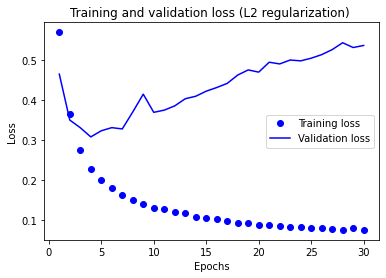

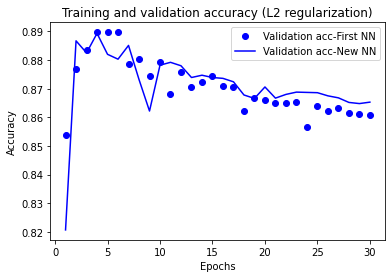

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.4376 - accuracy: 0.8228
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2560 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.1989 - accuracy: 0.9291
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2976 - accuracy: 0.8825
Loss:[0.29763561487197876]   Accuracy:[0.8825200200080872]


In [16]:
# Loading the IMDB dataset (Add L2 regularization (examine 2 weights, but submit only one) [3])
#******************************
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])


# Decoding reviews back to text
#******************************
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

#Preparing the data
#Encoding the integer sequences via multi-hot encoding
#*****************************************************
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Building your model
# Model definition
#******************************
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
model = keras.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.0005), activation="relu"))
#model.add(layers.Dense(16, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.0005), activation="relu"))
#model.add(layers.Dense(16, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

# Compiling the model
#******************************
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Validating your approach
# Setting aside a validation set
#*******************************
x_val = x_train[:10000] # to be used for validation
partial_x_train = x_train[10000:] 
y_val = y_train[:10000] # to be used for validation
partial_y_train = y_train[10000:]


# Training your model
#*******************************
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss
#******************************************
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (L2 regularization) ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and validation accuracy
#**********************************************
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, first, "bo", label="Validation acc-First NN")
plt.plot(epochs, val_acc, "b", label="Validation acc-New NN")
plt.title("Training and validation accuracy (L2 regularization)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch
#********************************
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(f"Loss:[{results[0]}]   Accuracy:[{results[1]}]")

Epoch 1/30
30/30 [==============================] - 2s 49ms/step - loss: 0.8506 - accuracy: 0.7532 - val_loss: 0.6112 - val_accuracy: 0.8482
Epoch 2/30
30/30 [==============================] - 1s 39ms/step - loss: 0.5603 - accuracy: 0.8605 - val_loss: 0.5557 - val_accuracy: 0.8410
Epoch 3/30
30/30 [==============================] - 1s 39ms/step - loss: 0.5086 - accuracy: 0.8699 - val_loss: 0.5000 - val_accuracy: 0.8699
Epoch 4/30
30/30 [==============================] - 1s 40ms/step - loss: 0.4790 - accuracy: 0.8767 - val_loss: 0.4873 - val_accuracy: 0.8693
Epoch 5/30
30/30 [==============================] - 1s 40ms/step - loss: 0.4643 - accuracy: 0.8813 - val_loss: 0.4728 - val_accuracy: 0.8782
Epoch 6/30
30/30 [==============================] - 1s 40ms/step - loss: 0.4529 - accuracy: 0.8820 - val_loss: 0.4663 - val_accuracy: 0.8780
Epoch 7/30
30/30 [==============================] - 1s 40ms/step - loss: 0.4468 - accuracy: 0.8815 - val_loss: 0.4917 - val_accuracy: 0.8601
Epoch 8/30
30

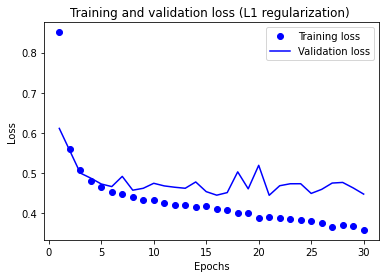

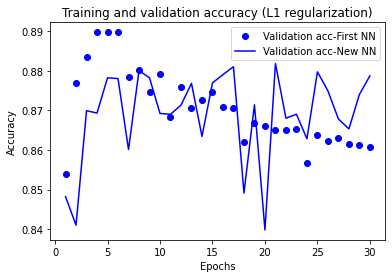

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4337 - accuracy: 0.8196
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2465 - accuracy: 0.9136
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1980 - accuracy: 0.9293
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3089 - accuracy: 0.8786
Loss:[0.30893900990486145]   Accuracy:[0.8786399960517883]


In [20]:
# Loading the IMDB dataset (Add L1 regularization (examine 2 weights, but submit only one)) [4]
#******************************
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])


# Decoding reviews back to text
#******************************
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

#Preparing the data
#Encoding the integer sequences via multi-hot encoding
#*****************************************************
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Building your model
# Model definition
#******************************
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
model = keras.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
#model.add(layers.Dense(16, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
#model.add(layers.Dense(16, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

# Compiling the model
#******************************
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Validating your approach
# Setting aside a validation set
#*******************************
x_val = x_train[:10000] # to be used for validation
partial_x_train = x_train[10000:] 
y_val = y_train[:10000] # to be used for validation
partial_y_train = y_train[10000:]


# Training your model
#*******************************
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss
#******************************************
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (L1 regularization) ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and validation accuracy
#**********************************************
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, first, "bo", label="Validation acc-First NN")
plt.plot(epochs, val_acc, "b", label="Validation acc-New NN")
plt.title("Training and validation accuracy (L1 regularization)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch
#********************************
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(f"Loss:[{results[0]}]   Accuracy:[{results[1]}]")

Epoch 1/30
30/30 [==============================] - 2s 47ms/step - loss: 0.5991 - accuracy: 0.6753 - val_loss: 0.4660 - val_accuracy: 0.8576
Epoch 2/30
30/30 [==============================] - 1s 37ms/step - loss: 0.4548 - accuracy: 0.8061 - val_loss: 0.3555 - val_accuracy: 0.8810
Epoch 3/30
30/30 [==============================] - 1s 38ms/step - loss: 0.3714 - accuracy: 0.8529 - val_loss: 0.3118 - val_accuracy: 0.8852
Epoch 4/30
30/30 [==============================] - 1s 37ms/step - loss: 0.3145 - accuracy: 0.8825 - val_loss: 0.2928 - val_accuracy: 0.8837
Epoch 5/30
30/30 [==============================] - 1s 38ms/step - loss: 0.2790 - accuracy: 0.8991 - val_loss: 0.2727 - val_accuracy: 0.8931
Epoch 6/30
30/30 [==============================] - 1s 37ms/step - loss: 0.2363 - accuracy: 0.9195 - val_loss: 0.2718 - val_accuracy: 0.8925
Epoch 7/30
30/30 [==============================] - 1s 38ms/step - loss: 0.2127 - accuracy: 0.9268 - val_loss: 0.2812 - val_accuracy: 0.8917
Epoch 8/30
30

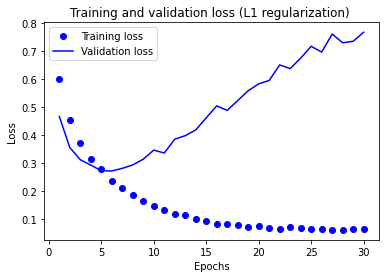

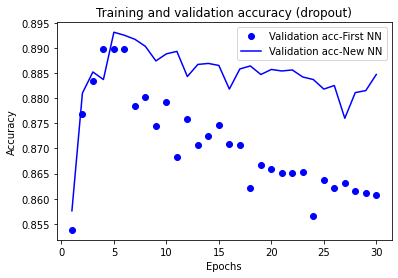

Epoch 1/4
49/49 [==============================] - 3s 45ms/step - loss: 0.4436 - accuracy: 0.8240
Epoch 2/4
49/49 [==============================] - 2s 46ms/step - loss: 0.2518 - accuracy: 0.9120
Epoch 3/4
49/49 [==============================] - 2s 30ms/step - loss: 0.1957 - accuracy: 0.9295
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3022 - accuracy: 0.8816
Loss:[0.30219703912734985]   Accuracy:[0.8816400170326233]


In [24]:
# Loading the IMDB dataset (Add dropout (examine 2 ratios, but submit only one)) [5]
#******************************
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])


# Decoding reviews back to text
#******************************
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

#Preparing the data
#Encoding the integer sequences via multi-hot encoding
#*****************************************************
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Building your model
# Model definition
#******************************
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
model = keras.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

# Compiling the model
#******************************
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Validating your approach
# Setting aside a validation set
#*******************************
x_val = x_train[:10000] # to be used for validation
partial_x_train = x_train[10000:] 
y_val = y_train[:10000] # to be used for validation
partial_y_train = y_train[10000:]


# Training your model
#*******************************
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss
#******************************************
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (L1 regularization) ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and validation accuracy
#**********************************************
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, first, "bo", label="Validation acc-First NN")
plt.plot(epochs, val_acc, "b", label="Validation acc-New NN")
plt.title("Training and validation accuracy (dropout)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch
#********************************
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(f"Loss:[{results[0]}]   Accuracy:[{results[1]}]")

Epoch 1/30
30/30 [==============================] - 2s 46ms/step - loss: 0.5984 - accuracy: 0.7602 - val_loss: 0.5209 - val_accuracy: 0.8070
Epoch 2/30
30/30 [==============================] - 1s 36ms/step - loss: 0.4443 - accuracy: 0.8797 - val_loss: 0.4099 - val_accuracy: 0.8752
Epoch 3/30
30/30 [==============================] - 1s 35ms/step - loss: 0.3411 - accuracy: 0.9071 - val_loss: 0.3475 - val_accuracy: 0.8792
Epoch 4/30
30/30 [==============================] - 1s 39ms/step - loss: 0.2717 - accuracy: 0.9235 - val_loss: 0.3117 - val_accuracy: 0.8863
Epoch 5/30
30/30 [==============================] - 1s 36ms/step - loss: 0.2242 - accuracy: 0.9329 - val_loss: 0.2847 - val_accuracy: 0.8931
Epoch 6/30
30/30 [==============================] - 1s 36ms/step - loss: 0.1908 - accuracy: 0.9430 - val_loss: 0.2763 - val_accuracy: 0.8922
Epoch 7/30
30/30 [==============================] - 1s 36ms/step - loss: 0.1647 - accuracy: 0.9514 - val_loss: 0.2747 - val_accuracy: 0.8913
Epoch 8/30
30

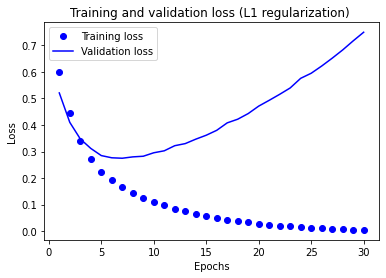

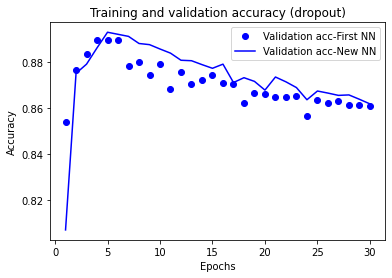

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4566 - accuracy: 0.8245
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2660 - accuracy: 0.9077
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2052 - accuracy: 0.9271
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2970 - accuracy: 0.8821
Loss:[0.29701361060142517]   Accuracy:[0.8821200132369995]


In [25]:
# Loading the IMDB dataset (No regularization 8x4x1) [6]
#******************************
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])


# Decoding reviews back to text
#******************************
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

#Preparing the data
#Encoding the integer sequences via multi-hot encoding
#*****************************************************
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Building your model
# Model definition
#******************************
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
model = keras.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
model.add(layers.Dense(8, activation="relu"))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
model.add(layers.Dense(8, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

# Compiling the model
#******************************
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Validating your approach
# Setting aside a validation set
#*******************************
x_val = x_train[:10000] # to be used for validation
partial_x_train = x_train[10000:] 
y_val = y_train[:10000] # to be used for validation
partial_y_train = y_train[10000:]


# Training your model
#*******************************
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss
#******************************************
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (L1 regularization) ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and validation accuracy
#**********************************************
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, first, "bo", label="Validation acc-First NN")
plt.plot(epochs, val_acc, "b", label="Validation acc-New NN")
plt.title("Training and validation accuracy (dropout)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch
#********************************
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(f"Loss:[{results[0]}]   Accuracy:[{results[1]}]")

Epoch 1/30
30/30 [==============================] - 2s 46ms/step - loss: 0.6127 - accuracy: 0.6789 - val_loss: 0.5107 - val_accuracy: 0.8146
Epoch 2/30
30/30 [==============================] - 1s 37ms/step - loss: 0.4808 - accuracy: 0.8139 - val_loss: 0.4123 - val_accuracy: 0.8745
Epoch 3/30
30/30 [==============================] - 1s 39ms/step - loss: 0.3985 - accuracy: 0.8610 - val_loss: 0.3564 - val_accuracy: 0.8842
Epoch 4/30
30/30 [==============================] - 1s 36ms/step - loss: 0.3364 - accuracy: 0.8895 - val_loss: 0.3188 - val_accuracy: 0.8871
Epoch 5/30
30/30 [==============================] - 1s 36ms/step - loss: 0.2909 - accuracy: 0.9085 - val_loss: 0.2993 - val_accuracy: 0.8894
Epoch 6/30
30/30 [==============================] - 1s 36ms/step - loss: 0.2534 - accuracy: 0.9228 - val_loss: 0.2888 - val_accuracy: 0.8889
Epoch 7/30
30/30 [==============================] - 1s 36ms/step - loss: 0.2211 - accuracy: 0.9361 - val_loss: 0.2886 - val_accuracy: 0.8890
Epoch 8/30
30

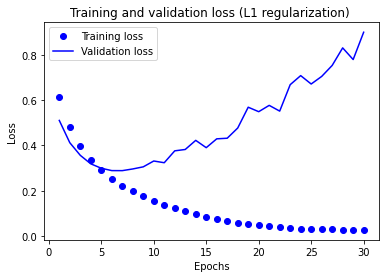

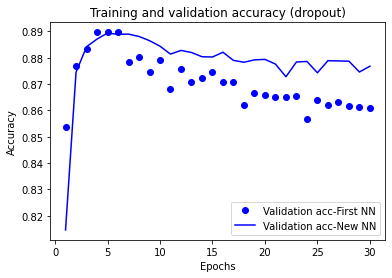

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4478 - accuracy: 0.8166
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2549 - accuracy: 0.9100
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.1979 - accuracy: 0.9302
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3213 - accuracy: 0.8741
Loss:[0.3212749660015106]   Accuracy:[0.8741199970245361]


In [27]:
# Loading the IMDB dataset (No regularization 8x4x1 + Dropout) [7]
#******************************
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])


# Decoding reviews back to text
#******************************
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

#Preparing the data
#Encoding the integer sequences via multi-hot encoding
#*****************************************************
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Building your model
# Model definition
#******************************
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
model = keras.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dropout(0.2))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0005), activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation="sigmoid"))

# Compiling the model
#******************************
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Validating your approach
# Setting aside a validation set
#*******************************
x_val = x_train[:10000] # to be used for validation
partial_x_train = x_train[10000:] 
y_val = y_train[:10000] # to be used for validation
partial_y_train = y_train[10000:]


# Training your model
#*******************************
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss
#******************************************
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (L1 regularization) ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and validation accuracy
#**********************************************
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, first, "bo", label="Validation acc-First NN")
plt.plot(epochs, val_acc, "b", label="Validation acc-New NN")
plt.title("Training and validation accuracy (dropout)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch
#********************************
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(f"Loss:[{results[0]}]   Accuracy:[{results[1]}]")